Dispositivo utilizado: cpu

INICIANDO COMPARAÇÃO - DATASET: MNIST

MNIST carregado com sucesso!
Tamanho do conjunto de treino: 5000
Tamanho do conjunto de teste: 2000
Número de classes: 10


######################################################################
TREINANDO MobileNet
######################################################################

MobileNet carregado com sucesso!
Parâmetros totais: 2,236,682
Parâmetros treináveis: 2,236,682
Época [1/1], Passo [20/157], Loss: 2.3251, Acc: 18.12%
Época [1/1], Passo [40/157], Loss: 1.4549, Acc: 28.44%
Época [1/1], Passo [60/157], Loss: 1.6155, Acc: 37.29%
Época [1/1], Passo [80/157], Loss: 0.5271, Acc: 45.55%
Época [1/1], Passo [100/157], Loss: 0.8557, Acc: 51.47%
Época [1/1], Passo [120/157], Loss: 0.4999, Acc: 55.96%
Época [1/1], Passo [140/157], Loss: 0.7028, Acc: 59.69%

Época 1 concluída em 97.41s
Loss médio: 1.1070, Acurácia: 62.26%


=== RESULTADOS DA AVALIAÇÃO ===
Acurácia: 84.90%
Precisão: 85.08%
Recall: 84.90%
F1-Score: 84.8

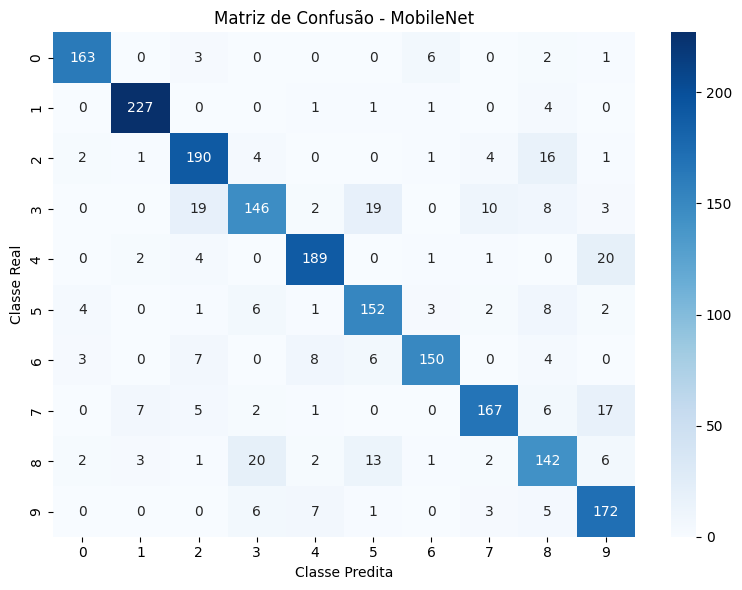



######################################################################
TREINANDO AlexNet
######################################################################

AlexNet carregado com sucesso!
Parâmetros totais: 57,044,810
Parâmetros treináveis: 57,044,810
Época [1/1], Passo [20/157], Loss: 2.3232, Acc: 8.12%
Época [1/1], Passo [40/157], Loss: 2.2025, Acc: 9.69%
Época [1/1], Passo [60/157], Loss: 2.2783, Acc: 12.14%
Época [1/1], Passo [80/157], Loss: 2.1023, Acc: 12.62%
Época [1/1], Passo [100/157], Loss: 1.7025, Acc: 15.03%
Época [1/1], Passo [120/157], Loss: 1.7370, Acc: 17.37%
Época [1/1], Passo [140/157], Loss: 1.6051, Acc: 19.75%

Época 1 concluída em 195.74s
Loss médio: 2.1066, Acurácia: 22.06%


=== RESULTADOS DA AVALIAÇÃO ===
Acurácia: 49.65%
Precisão: 36.75%
Recall: 49.65%
F1-Score: 40.38%
Tempo de Inferência: 13.46s


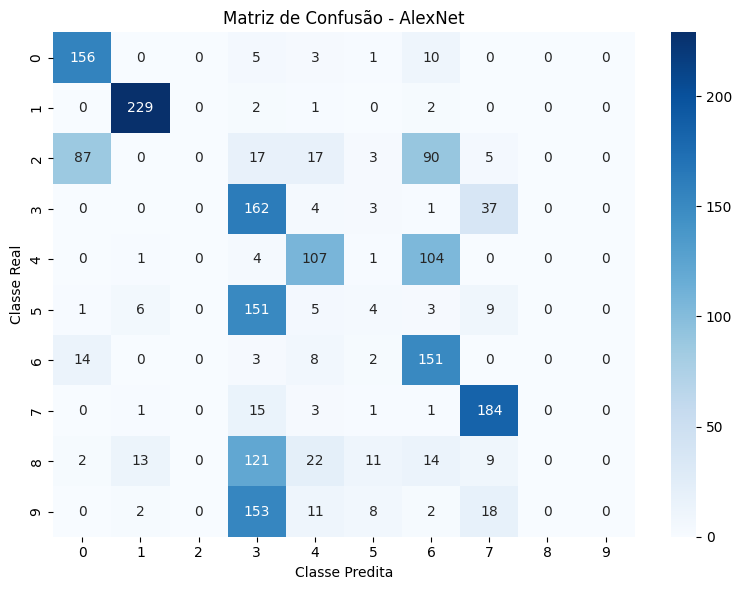



######################################################################
TREINANDO ResNet
######################################################################

ResNet carregado com sucesso!
Parâmetros totais: 11,181,642
Parâmetros treináveis: 11,181,642
Época [1/1], Passo [20/157], Loss: 0.2365, Acc: 74.38%
Época [1/1], Passo [40/157], Loss: 0.1956, Acc: 82.19%
Época [1/1], Passo [60/157], Loss: 0.2866, Acc: 84.27%
Época [1/1], Passo [80/157], Loss: 0.7375, Acc: 86.37%
Época [1/1], Passo [100/157], Loss: 0.2894, Acc: 87.81%
Época [1/1], Passo [120/157], Loss: 0.2826, Acc: 88.78%
Época [1/1], Passo [140/157], Loss: 0.1081, Acc: 89.82%

Época 1 concluída em 158.00s
Loss médio: 0.3247, Acurácia: 90.22%


=== RESULTADOS DA AVALIAÇÃO ===
Acurácia: 90.70%
Precisão: 91.32%
Recall: 90.70%
F1-Score: 90.70%
Tempo de Inferência: 19.06s


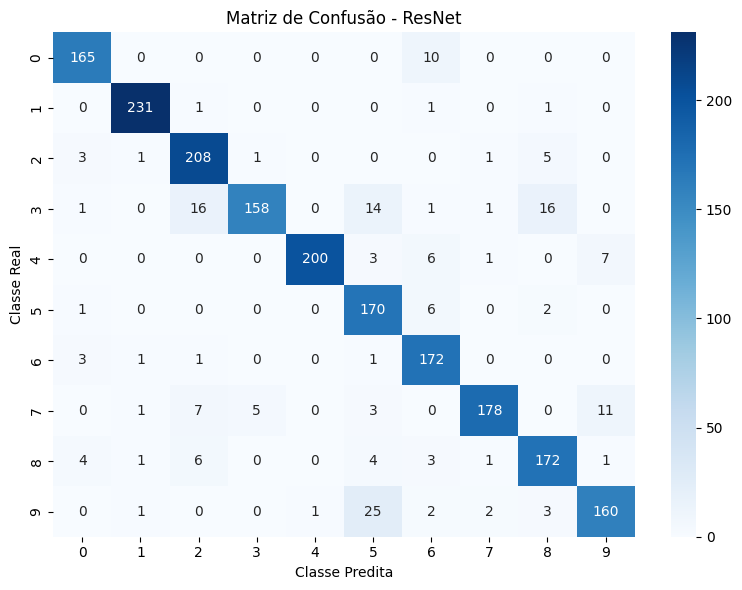



ANÁLISE COMPARATIVA - MNIST

Modelo          Acurácia     Precisão     Recall       F1-Score    
----------------------------------------------------------------------
MobileNet       84.90      % 85.08      % 84.90      % 84.88      %
AlexNet         49.65      % 36.75      % 49.65      % 40.38      %
ResNet          90.70      % 91.32      % 90.70      % 90.70      %


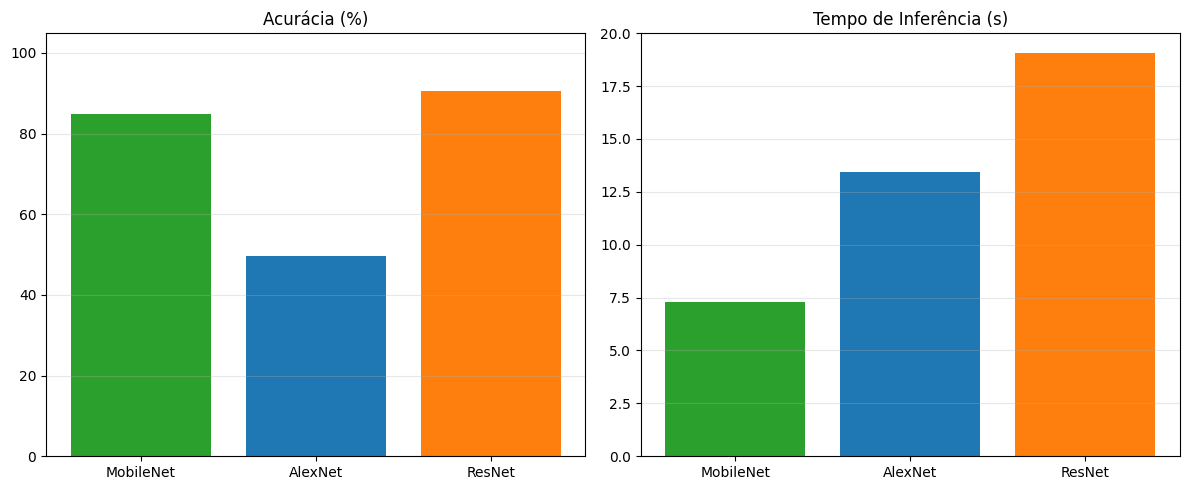

In [1]:
# ====================================================================
# VISÃO COMPUTACIONAL - VERSÃO OTIMIZADA PARA MEMÓRIA
# Avaliação Comparativa de Modelos em Classificação de Imagens
# ====================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as transforms
from torchvision import datasets, models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

# Configurar dispositivo e memória
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo utilizado: {device}')

# Limpar cache de memória GPU se disponível
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# ====================================================================
# PREPARAÇÃO DOS DADOS - OTIMIZADA
# ====================================================================

def prepare_datasets(dataset_name='MNIST', batch_size=32):
    """
    Prepara datasets com configurações otimizadas para memória
    """
    # Usar imagens menores (64x64) para economizar memória
    if dataset_name == 'MNIST':
        transform_train = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        transform_test = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        train_dataset = datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform_train)
        test_dataset = datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform_test)
        num_classes = 10

    elif dataset_name == 'CIFAR10':
        transform_train = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        transform_test = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
        test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
        num_classes = 10

    elif dataset_name == 'FashionMNIST':
        transform_train = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        transform_test = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        train_dataset = datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform_train)
        test_dataset = datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform_test)
        num_classes = 10

    # Usar subsets menores
    train_size = 5000  # Reduzido para economizar memória
    test_size = 2000

    train_indices = list(range(min(train_size, len(train_dataset))))
    test_indices = list(range(min(test_size, len(test_dataset))))

    train_dataset = Subset(train_dataset, train_indices)
    test_dataset = Subset(test_dataset, test_indices)

    # DataLoaders com menos workers
    train_loader = DataLoader(train_dataset, batch_size=batch_size,
                             shuffle=True, num_workers=0, pin_memory=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size,
                            shuffle=False, num_workers=0, pin_memory=False)

    print(f'\n{dataset_name} carregado com sucesso!')
    print(f'Tamanho do conjunto de treino: {len(train_dataset)}')
    print(f'Tamanho do conjunto de teste: {len(test_dataset)}')
    print(f'Número de classes: {num_classes}')

    return train_loader, test_loader, num_classes

# ====================================================================
# MODELOS SIMPLIFICADOS
# ====================================================================

def load_model(model_name, num_classes):
    """
    Carrega modelos com configurações otimizadas para memória
    """
    if model_name == 'AlexNet':
        # Usar versão simplificada do AlexNet
        model = models.alexnet(pretrained=False)
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, num_classes)

    elif model_name == 'ResNet':
        # Usar ResNet18 ao invés de ResNet50
        model = models.resnet18(pretrained=False)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, num_classes)

    elif model_name == 'MobileNet':
        model = models.mobilenet_v2(pretrained=False)
        num_features = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_features, num_classes)

    model = model.to(device)
    print(f'\n{model_name} carregado com sucesso!')

    return model

def get_model_info(model):
    """
    Obtém informações básicas do modelo
    """
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f'Parâmetros totais: {total_params:,}')
    print(f'Parâmetros treináveis: {trainable_params:,}')

    return {
        'total_params': total_params,
        'trainable_params': trainable_params
    }

# ====================================================================
# TREINAMENTO E AVALIAÇÃO
# ====================================================================

def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
    """
    Treina o modelo com limpeza de memória
    """
    model.train()
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        start_time = time.time()

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Limpar memória periodicamente
            if (i + 1) % 10 == 0:
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

            if (i + 1) % 20 == 0:
                print(f'Época [{epoch+1}/{num_epochs}], Passo [{i+1}/{len(train_loader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        epoch_time = time.time() - start_time
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100. * correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f'\nÉpoca {epoch+1} concluída em {epoch_time:.2f}s')
        print(f'Loss médio: {epoch_loss:.4f}, Acurácia: {epoch_acc:.2f}%\n')

    return train_losses, train_accuracies

def evaluate_model(model, test_loader):
    """
    Avalia o modelo
    """
    model.eval()
    all_preds = []
    all_labels = []

    start_time = time.time()

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Limpar memória
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    inference_time = time.time() - start_time

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'inference_time': inference_time,
        'all_preds': all_preds,
        'all_labels': all_labels
    }

    print(f'\n=== RESULTADOS DA AVALIAÇÃO ===')
    print(f'Acurácia: {accuracy*100:.2f}%')
    print(f'Precisão: {precision*100:.2f}%')
    print(f'Recall: {recall*100:.2f}%')
    print(f'F1-Score: {f1*100:.2f}%')
    print(f'Tempo de Inferência: {inference_time:.2f}s')

    return metrics

def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    """
    Plota a matriz de confusão
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.tight_layout()
    plt.show()

# ====================================================================
# PIPELINE COMPLETO
# ====================================================================

def run_comparison(dataset_name='MNIST', num_epochs=1, batch_size=32):
    """
    Executa comparação entre modelos
    """
    print(f'\n{"="*70}')
    print(f'INICIANDO COMPARAÇÃO - DATASET: {dataset_name}')
    print(f'{"="*70}')

    train_loader, test_loader, num_classes = prepare_datasets(dataset_name, batch_size)

    if dataset_name == 'MNIST':
        class_names = [str(i) for i in range(10)]
    elif dataset_name == 'CIFAR10':
        class_names = ['avião', 'carro', 'pássaro', 'gato', 'cervo',
                      'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']
    elif dataset_name == 'FashionMNIST':
        class_names = ['Camiseta', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
                      'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

    model_names = ['MobileNet', 'AlexNet', 'ResNet']
    results = {}

    for model_name in model_names:
        print(f'\n\n{"#"*70}')
        print(f'TREINANDO {model_name}')
        print(f'{"#"*70}')

        # Limpar memória antes de cada modelo
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        model = load_model(model_name, num_classes)
        model_info = get_model_info(model)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        train_losses, train_accuracies = train_model(model, train_loader,
                                                     criterion, optimizer, num_epochs)

        metrics = evaluate_model(model, test_loader)

        results[model_name] = {
            'model_info': model_info,
            'metrics': metrics,
            'train_losses': train_losses,
            'train_accuracies': train_accuracies
        }

        plot_confusion_matrix(metrics['all_labels'], metrics['all_preds'],
                            class_names, model_name)

        # Deletar modelo para liberar memória
        del model
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    # Análise comparativa
    print(f'\n\n{"="*70}')
    print(f'ANÁLISE COMPARATIVA - {dataset_name}')
    print(f'{"="*70}\n')

    print(f'{"Modelo":<15} {"Acurácia":<12} {"Precisão":<12} {"Recall":<12} {"F1-Score":<12}')
    print("-" * 70)
    for model_name, data in results.items():
        m = data['metrics']
        print(f'{model_name:<15} {m["accuracy"]*100:<11.2f}% {m["precision"]*100:<11.2f}% '
              f'{m["recall"]*100:<11.2f}% {m["f1_score"]*100:<11.2f}%')

    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    accuracies = [results[m]['metrics']['accuracy']*100 for m in model_names]
    axes[0].bar(model_names, accuracies, color=['#2ca02c', '#1f77b4', '#ff7f0e'])
    axes[0].set_title('Acurácia (%)')
    axes[0].set_ylim([0, 105])
    axes[0].grid(axis='y', alpha=0.3)

    inf_times = [results[m]['metrics']['inference_time'] for m in model_names]
    axes[1].bar(model_names, inf_times, color=['#2ca02c', '#1f77b4', '#ff7f0e'])
    axes[1].set_title('Tempo de Inferência (s)')
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results

# ====================================================================
# EXECUÇÃO
# ====================================================================

# Execute com configurações otimizadas
results = run_comparison(dataset_name='MNIST', num_epochs=1, batch_size=32)